In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data visualization

In [2]:
# manually generate array data
x_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

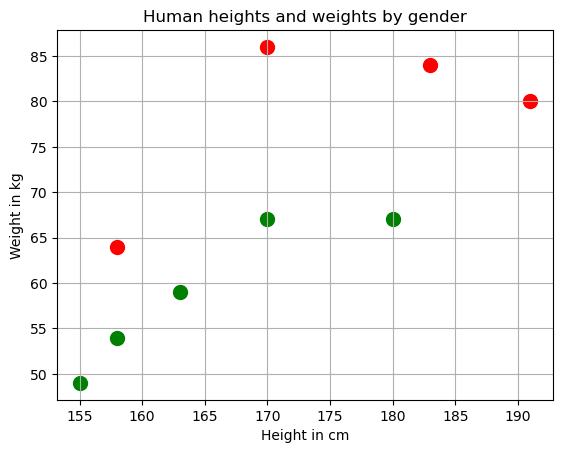

In [3]:
plt.title('Human heights and weights by gender')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(x_train):
    plt.scatter(x[0], x[1], c='g' if y_train[i] == 'female' else 'r', marker="o", s=100)

plt.grid(True)
plt.show()

In [4]:
# read data from csv file
df1 = pd.read_csv("1-height-weight-gender-train.csv")
df1

,Height,Weight,Gender
0,158,64,male
1,170,86,male
2,183,84,male
3,191,80,male
4,155,49,female
5,163,59,female
6,180,67,female
7,158,54,female
8,170,67,female


In [5]:
x_train = np.array(df1[["Height", "Weight"]])
x_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [170,  67]])

In [6]:
y_train = np.array(df1[["Gender"]]).T
y_train

array([['male', 'male', 'male', 'male', 'female', 'female', 'female',
        'female', 'female']], dtype=object)

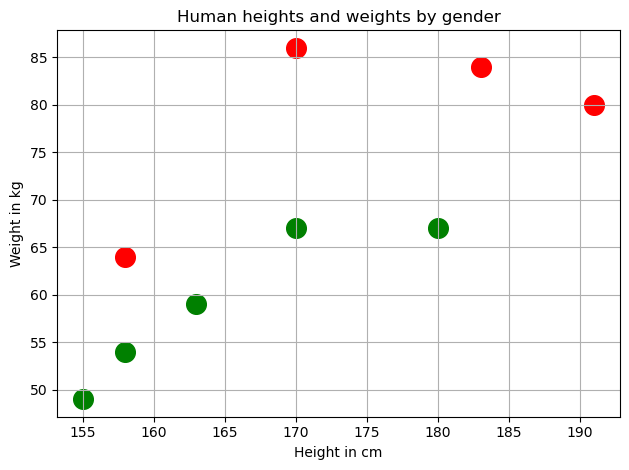

In [7]:
plt.figure()
plt.title('Human heights and weights by gender')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(x_train):
    plt.scatter(x[0], x[1], c='g' if y_train[0][i] == 'female' else 'r', marker="o", s=200)

plt.grid()
plt.tight_layout()
plt.savefig("1-height-weight-gender-plot.png")

## 2. Prediction using Euclidean distancee

In [8]:
# test point (155 cm, 70 kg) as a reference
# cal distance between test point and all training instances in dataset

x_diff = (x_train[:, 0] - 155)**2
y_diff = (x_train[:, 1] - 70)**2
print("X_diff =", x_diff)
print("Y_diff =", y_diff)

dist_test_train_points = np.sqrt(x_diff + y_diff).reshape(-1, 1)
dist_test_train_points

X_diff = [   9  225  784 1296    0   64  625    9  225]
Y_diff = [ 36 256 196 100 441 121   9 256   9]


array([[ 6.70820393],
       [21.9317122 ],
       [31.30495168],
       [37.36308338],
       [21.        ],
       [13.60147051],
       [25.17935662],
       [16.2788206 ],
       [15.29705854]])

In [9]:
# transform an array to a dataframe

df_dist_test_train_points = pd.DataFrame({'Distance': dist_test_train_points[:, 0]})
df_dist_test_train_points

,Distance
0,6.708204
1,21.931712
2,31.304952
3,37.363083
4,21.000000
5,13.601471
6,25.179357
7,16.278821
8,15.297059


In [10]:
# concatate distance data to train dataframe

df2 = pd.concat([df1, df_dist_test_train_points], axis="columns")
df2

,Height,Weight,Gender,Distance
0,158,64,male,6.708204
1,170,86,male,21.931712
2,183,84,male,31.304952
3,191,80,male,37.363083
4,155,49,female,21.000000
5,163,59,female,13.601471
6,180,67,female,25.179357
7,158,54,female,16.278821
8,170,67,female,15.297059


In [11]:
# test point (150 cm and 70 kg)
test_point = np.array([[155, 70]])
test_point

array([[155,  70]])

In [12]:
# print(x_train[:, 0])
x_distance = np.sqrt(np.sum((x_train - test_point)**2, axis=1))
x_distance

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [13]:
x_diff = (x_train[:, 0] - 155)**2
y_diff = (x_train[:, 1] - 70)**2
print("X_diff =", x_diff)
print("Y_diff =", y_diff)

dist_test_train_points = np.sqrt(x_diff + y_diff)
print("\nDistance between test and training points =", dist_test_train_points)

X_diff = [   9  225  784 1296    0   64  625    9  225]
Y_diff = [ 36 256 196 100 441 121   9 256   9]

Distance between test and training points = [ 6.70820393 21.9317122  31.30495168 37.36308338 21.         13.60147051
 25.17935662 16.2788206  15.29705854]


In [14]:
# returns indices that would sort an array

dist_test_train_points.argsort() # 0号距离最近，然后是5号，8号

array([0, 5, 8, 7, 4, 1, 6, 2, 3])

In [15]:
nearest_neighbor_indices = dist_test_train_points.argsort()[:3] # 取三个最近点的id
nearest_neighbor_indices

array([0, 5, 8])

In [16]:
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices) # 取最近三个点的性别
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype=object)

In [17]:
from collections import Counter
b = Counter(np.take(y_train, dist_test_train_points.argsort()[:3]))

print(b) # 按个数排序，两个女一个男
b.most_common(1)[0][0]

Counter({'female': 2, 'male': 1})


'female'

## 3. Replot of query instance and its three neighbors

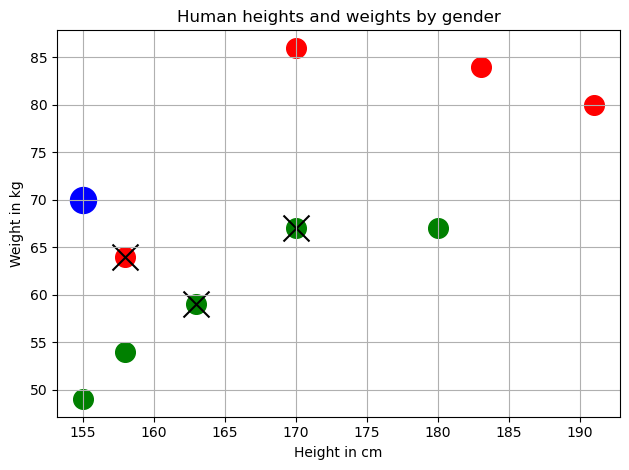

In [18]:
plt.figure()
plt.title('Human heights and weights by gender')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(x_train):
    plt.scatter(x[0], x[1], c='g' if y_train[0][i] == 'female' else 'r', marker="o", s=200)

plt.scatter(155, 70, s=350, c='b', marker='o') # reference
plt.scatter(158, 64, s=350, c='k', marker='x') # 3 neighbors
plt.scatter(163, 59, s=350, c='k', marker='x')
plt.scatter(170, 67, s=350, c='k', marker='x')

plt.grid()
plt.tight_layout()

plt.savefig("1-height-weight-gender-test.png")

## 4. kNN classifier using scikit-learn

In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

### 4.1 Prediction for one test point

In [20]:
# 1. `LabelBinarizer` to convert labels (famele and male) to integers
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train.tolist()[0]) # np array to python list
y_train_binarized # male=1 and female=0

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [21]:
# 2. initialize `KNeighborsClassifier`, call `fit` and `predict`
K = 3 # 3 neighbors
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(x_train, y_train_binarized.reshape(-1))

prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]  
prediction_binarized # 0=female, 1=male

0

In [22]:
# 3. use our fit `LabelBinarizer` to reverse transformation and return a string label
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], dtype='<U6')

### 4.2 Prediction for multiple points

In [23]:
# manually generate array data

x_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test = ['male', 'male', 'female', 'female']

In [24]:
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])

predictions_binarized = clf.predict(x_test)
print('Binarized predictions: %s' % predictions_binarized)

# 1st prediction is wrong
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [25]:
# performance measures - accuracy

from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


In [26]:
# performance measures - precision

from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


In [27]:
# performance measures - recall

from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


In [28]:
# performance measure - F1 score or F1 measure

from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 score: 0.6666666666666666


In [29]:
# performance measure - Matthews correlation coefficient (MCC)

from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews correlation coefficient: 0.5773502691896258


In [30]:
# `classification_report` function from scikit-learn

from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized, target_names=['male'], labels=[1]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2

